# Some 'Back of the Envelope' Calculations.

Have a glance through this notebook, but take it with a pinch of salt. A few caveats that need to be considered:

- I have gathered the initial figures from some internet research, but some, in particular the installation cost and solar panel total output, could be off. If anyone has a better figure for these, let me know and we can rerun the analysis to see how it changes things. This would benefit most from a consultation with an expert. You can see how each figure is defined in `data/ballpark_figures.yaml`.
- Electricity pricing is unpredictable at the moment, at least in terms of the next few years. I think it's reasonable to assume that prices will fall, but who knows by how much? I make an attempt to consider both high price and low price regimes, but if anyone has reliable resources that point to more concrete predictions for the future, they would be useful.
- I have not considered efficiency of the system as a whole, as I'm unsure of efficiency ratings. We'd need to consider battery storage efficiency also. In addition, solar panels degrade over time, and can ~ 0.5% of their efficiency per year, although when compared with the uncertainty of the rest of the numbers, this is the least of our worries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

In [2]:
yearly_electricity_bills = pd.read_csv("../data/yearly_electricity_bills.csv")

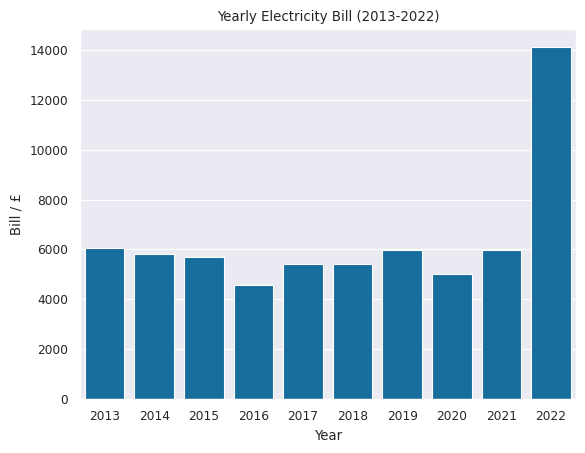

In [3]:
sns.set_theme(context="paper", style="darkgrid")
sns.barplot(
    data=yearly_electricity_bills,
    x="year",
    y="bill",
    color=sns.color_palette('colorblind')[0]
)

plt.title("Yearly Electricity Bill (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Bill / £")
plt.savefig("../plots/yearly_electricity_bill.png")

In [16]:
with open("../data/ballpark_figures.yaml", "r", encoding="utf-8") as filepath:
    parameters = yaml.load(filepath, Loader=yaml.FullLoader)

ballpark_installation_cost = parameters["installation_cost"]
ballpark_sell_back_rate = parameters["sell_back_rate"]
ballpark_yearly_bill = parameters["yearly_bill"]
expected_unit_rate = parameters["expected_unit_rate"]
ballpark_yearly_usage = ballpark_yearly_bill / expected_unit_rate
ave_hours_daylight = parameters["ave_hours_daylight"]
solar_panel_total_output = parameters["solar_panel_total_output"]
solar_panel_lifetime = parameters["solar_panel_lifetime"]

ave_yearly_output = solar_panel_total_output * ave_hours_daylight * 365.25
total_lifetime_output = ave_yearly_output * solar_panel_lifetime


## High Price Best Case Scenario: We Use All We Generate

Electricity is more expensive when we buy it compared to when we sell it.

**Note:** This analysis does not take into account fluctuations in price following demand (e.g. at different times of day).

In [17]:
# Our savings are just the panels' output multiplied by the unit rate.
# We also assume here that prices remain high (unlikely).

best_case_yearly_savings = ave_yearly_output * expected_unit_rate
best_case_payback_time = ballpark_installation_cost / best_case_yearly_savings

print(f"Solar panels pay for themselves in {round(best_case_payback_time, 2)} years.")

best_case_time_post_payback = solar_panel_lifetime - best_case_payback_time
print(f"Total Profit = £{round(best_case_time_post_payback * best_case_yearly_savings, 2)}")

Solar panels pay for themselves in 10.33 years.
Total Profit = £22726.61


## High Price Worst Case Scenario: We Sell All We Generate

Again, assuming unit prices remain high (see below for more discussion).

In [18]:
# Our savings are the panels' output multiplied by the expected sell back rate:

worst_case_yearly_savings = ave_yearly_output * ballpark_sell_back_rate
worst_case_payback_time = ballpark_installation_cost / worst_case_yearly_savings

print(f"Solar panels pay for themselves in {round(worst_case_payback_time, 2)} years.")

worst_case_time_post_payback = solar_panel_lifetime - worst_case_payback_time
print(f"Total Profit = £{round(worst_case_time_post_payback * worst_case_yearly_savings, 2)}")

Solar panels pay for themselves in 19.29 years.
Total Profit = £4731.59


## What if prices return to normal levels?

Let's assume a normal yearly bill of £8000. This is higher than the church's normal bill for years 2012-2021, but we expect some increase due to general inflation.

In [19]:
# Let's reverse engineer a more 'normal' unit rate:

normal_unit_rate = 8000 / ballpark_yearly_usage
print(f"Normal Unit Rate = {round(normal_unit_rate, 2)} p/kWh")

# Let's also assume that the normal sell back rate decreases proportionally:

normal_sell_back_rate = normal_unit_rate * (ballpark_sell_back_rate / expected_unit_rate)
print(f"Normal Sell Back Rate = {round(normal_sell_back_rate, 2)} p/kWh")

Normal Unit Rate = 0.16 p/kWh
Normal Sell Back Rate = 0.08 p/kWh


Now we repeat the analyses above. First for the best case scenario:

In [20]:
lp_best_case_yearly_savings = ave_yearly_output * normal_unit_rate
lp_best_case_payback_time = ballpark_installation_cost / lp_best_case_yearly_savings

print(f"Solar panels pay for themselves in {round(lp_best_case_payback_time, 2)} years.")

lp_best_case_time_post_payback = solar_panel_lifetime - lp_best_case_payback_time
print(f"Total Profit = £{round(lp_best_case_time_post_payback * lp_best_case_yearly_savings, 2)}")

Solar panels pay for themselves in 18.24 years.
Total Profit = £5932.06


Now for the worst case scenario:

In [21]:
lp_worst_case_yearly_savings = ave_yearly_output * normal_sell_back_rate
lp_worst_case_payback_time = ballpark_installation_cost / lp_worst_case_yearly_savings

print(f"Solar panels pay for themselves in {round(lp_worst_case_payback_time, 2)} years.")

lp_worst_case_time_post_payback = solar_panel_lifetime - lp_worst_case_payback_time
print(f"Total Profit = £{round(lp_worst_case_time_post_payback * lp_worst_case_yearly_savings, 2)}")

Solar panels pay for themselves in 34.07 years.
Total Profit = £-4259.07
